# Data Exploration

In [ ]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [4]:
data = pl.read_parquet("data.parquet")
data = data.drop("Light_ID")
data

Time,Arrivals,Centrality,Is_Entrypoint,Distance,Incoming_Cars
i16,i16,f32,bool,i16,i16
198,0,0.026253,true,9,15
198,0,0.026253,true,7,15
198,0,0.026253,true,7,15
198,0,0.026253,true,19,15
197,0,0.026253,true,9,15
…,…,…,…,…,…
17,0,0.026685,true,9,14
17,0,0.026685,true,7,14
10,1,0.026685,true,8,13


## Arrivals

In [6]:
data["Arrivals"].describe()

statistic,value
str,f64
"""count""",1.570169e6
"""null_count""",0.0
"""mean""",1.717964
"""std""",2.973533
"""min""",0.0
"""25%""",0.0
"""50%""",1.0
"""75%""",2.0
"""max""",77.0


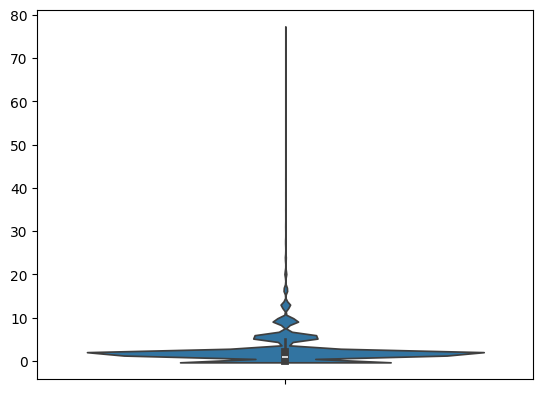

In [7]:
fig = sns.violinplot(data=data["Arrivals"])
plt.show()

In [8]:
data["Arrivals"].quantile(0.95)

7.0

In [15]:
data.filter(pl.col("Arrivals") > data["Arrivals"].quantile(0.95)).shape[0]


73946

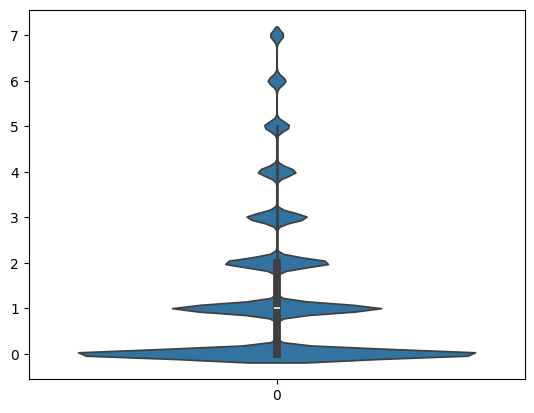

In [10]:
fig = sns.violinplot(
    data=data.filter(pl.col("Arrivals") <= data["Arrivals"].quantile(0.95)).select(
        pl.col("Arrivals")
    )
)
plt.show()


## Time

In [5]:
data["Time"].describe()

statistic,value
str,f64
"""count""",1.570169e6
"""null_count""",0.0
"""mean""",108.772721
"""std""",56.388691
"""min""",1.0
"""25%""",66.0
"""50%""",113.0
"""75%""",156.0
"""max""",200.0


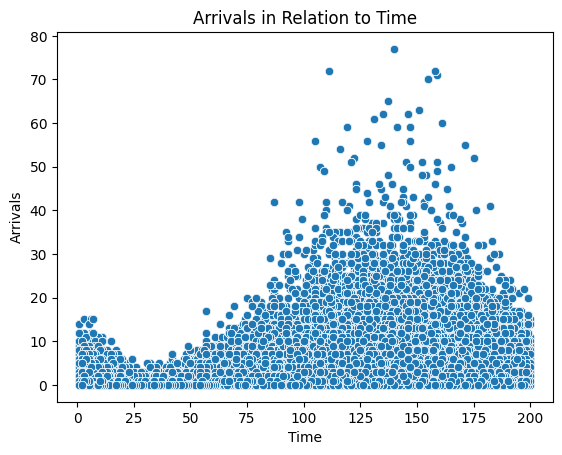

In [16]:
fig = sns.scatterplot(x=data["Time"], y=data["Arrivals"])
plt.xlabel("Time")
plt.ylabel("Arrivals")
plt.title("Arrivals in Relation to Time")
plt.show()

In [ ]:
slope, intercept, r_value, p_value, std_err = linregress(
    data["Time"].to_numpy(), data["Arrivals"].to_numpy()
)
r_squared = r_value**2
r_squared

np.float64(0.04185379493801329)

## Centrality

In [18]:
data["Centrality"].describe()

statistic,value
str,f64
"""count""",1.570169e6
"""null_count""",0.0
"""mean""",0.027587
"""std""",0.006223
"""min""",0.010966
"""25%""",0.023703
"""50%""",0.028226
"""75%""",0.031439
"""max""",0.042044


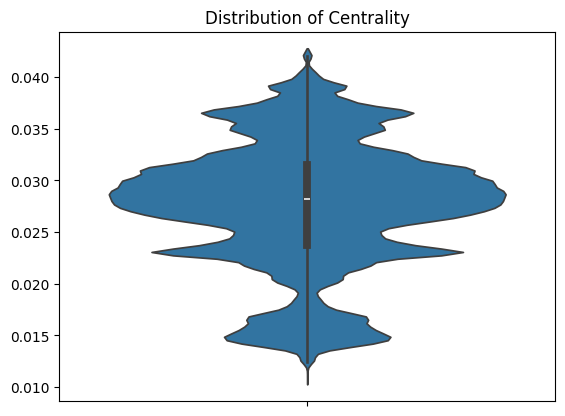

In [20]:
fig = sns.violinplot(data=data["Centrality"])
plt.title("Distribution of Centrality")
plt.show()

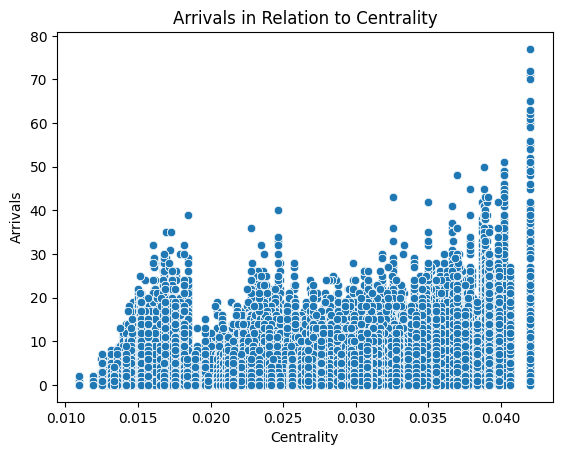

In [21]:
fig = sns.scatterplot(x=data["Centrality"], y=data["Arrivals"])
plt.xlabel("Centrality")
plt.ylabel("Arrivals")
plt.title("Arrivals in Relation to Centrality")
plt.show()


In [22]:
slope, intercept, r_value, p_value, std_err = linregress(
    data["Centrality"].to_numpy(), data["Arrivals"].to_numpy()
)
r_squared = r_value**2
r_squared


np.float64(0.012241416203854464)

## Is_Entrypoint

In [23]:
data["Is_Entrypoint"].value_counts()

Is_Entrypoint,count
bool,u32
true,1570169


In [24]:
data = data.drop("Is_Entrypoint")
data.columns

['Time', 'Arrivals', 'Centrality', 'Distance', 'Incoming_Cars']

## Distance

In [25]:
data["Distance"].describe()

statistic,value
str,f64
"""count""",1.570169e6
"""null_count""",0.0
"""mean""",10.646599
"""std""",4.94115
"""min""",5.0
"""25%""",7.0
"""50%""",9.0
"""75%""",12.0
"""max""",35.0


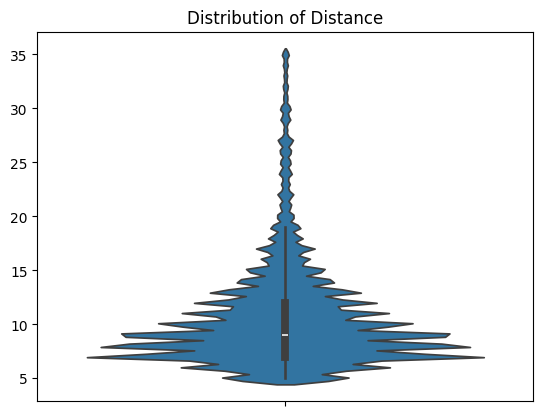

In [26]:
fig = sns.violinplot(data=data["Distance"])
plt.title("Distribution of Distance")
plt.show()


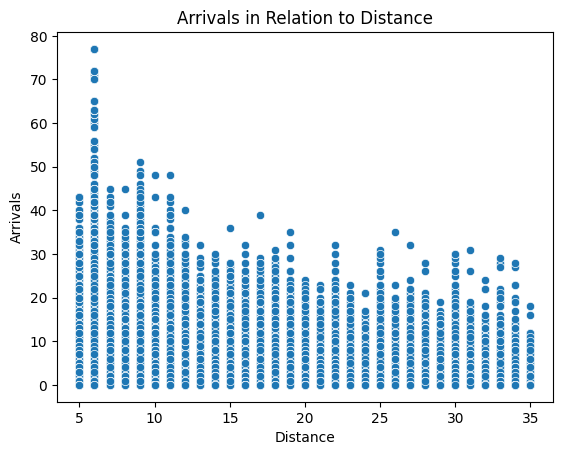

In [27]:
fig = sns.scatterplot(x=data["Distance"], y=data["Arrivals"])
plt.xlabel("Distance")
plt.ylabel("Arrivals")
plt.title("Arrivals in Relation to Distance")
plt.show()


In [ ]:
slope, intercept, r_value, p_value, std_err = linregress(
    data["Distance"].to_numpy(), data["Arrivals"].to_numpy()
)
r_squared = r_value**2
r_squared

np.float64(0.003378778018551892)

## Incoming_Cars

In [29]:
data["Incoming_Cars"].describe()

statistic,value
str,f64
"""count""",1.570169e6
"""null_count""",0.0
"""mean""",29.680571
"""std""",23.116883
"""min""",0.0
"""25%""",11.0
"""50%""",25.0
"""75%""",44.0
"""max""",229.0


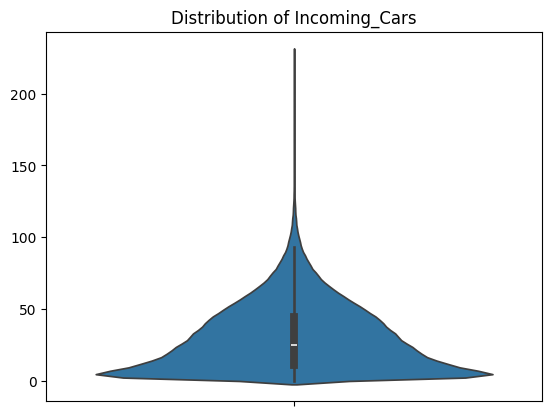

In [30]:
fig = sns.violinplot(data=data["Incoming_Cars"])
plt.title("Distribution of Incoming_Cars")
plt.show()


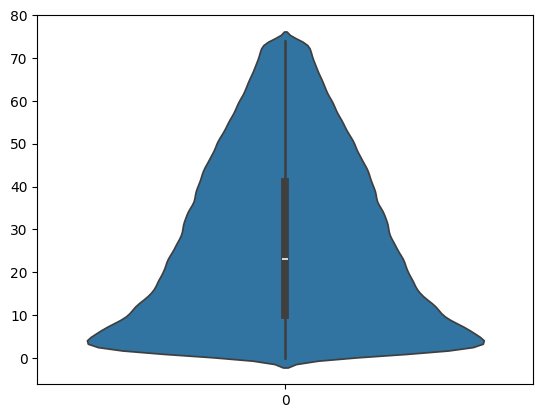

In [33]:
fig = sns.violinplot(
    data=data.filter(
        pl.col("Incoming_Cars") <= data["Incoming_Cars"].quantile(0.95)
    ).select(pl.col("Incoming_Cars"))
)
plt.show()


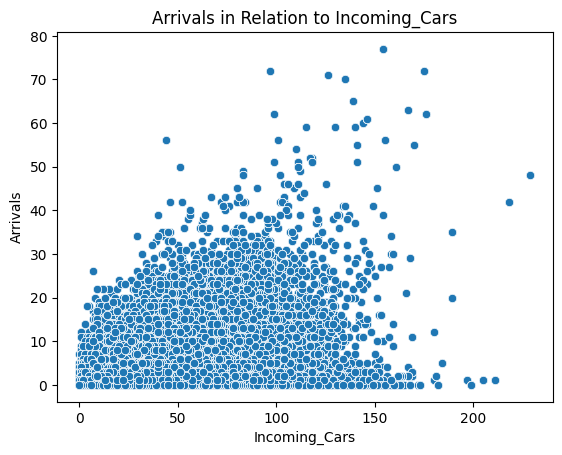

In [ ]:
fig = sns.scatterplot(x=data["Incoming_Cars"], y=data["Arrivals"])
plt.xlabel("Incoming_Cars")
plt.ylabel("Arrivals")
plt.title("Arrivals in Relation to Incoming_Cars")
plt.show()

In [32]:
slope, intercept, r_value, p_value, std_err = linregress(
    data["Incoming_Cars"].to_numpy(), data["Arrivals"].to_numpy()
)
r_squared = r_value**2
r_squared

np.float64(0.128514286117149)